In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
data = pd.read_csv("C:\\Users\\zisan\\Downloads\\Exploratory projects\\Bolt\\Ride-Sharing-Demand-Analysis\\demand_analysis_data.csv", parse_dates=["ride_timestamp"])

In [16]:
data.head()

,ride_id,ride_requests,ride_fulfillments,location,ride_timestamp,surge_pricing,weather_condition
0,19b1cc2f-c3e3-47fe-90ca-34659607baba,96,151,Vilnius,2025-01-01 11:28:40,True,Rainy
1,0cb88b96-62de-4484-8036-327ec4ecb365,197,139,Zurich,2025-01-02 07:55:00,True,Cloudy
2,e183628c-0159-4839-ba0d-657f7e6c93b9,76,143,Vienna,2025-01-01 00:47:38,False,Cloudy
3,1ca29f57-c36f-4448-9b8e-308023a2c00f,101,44,Paris,2025-01-02 16:05:47,True,Cloudy
4,e4640f6e-1306-4329-83ec-0e737d6560a5,124,158,Warsaw,2025-01-02 10:46:47,False,Clear


In [ ]:
# Line Chart: Trend in Ride Demand

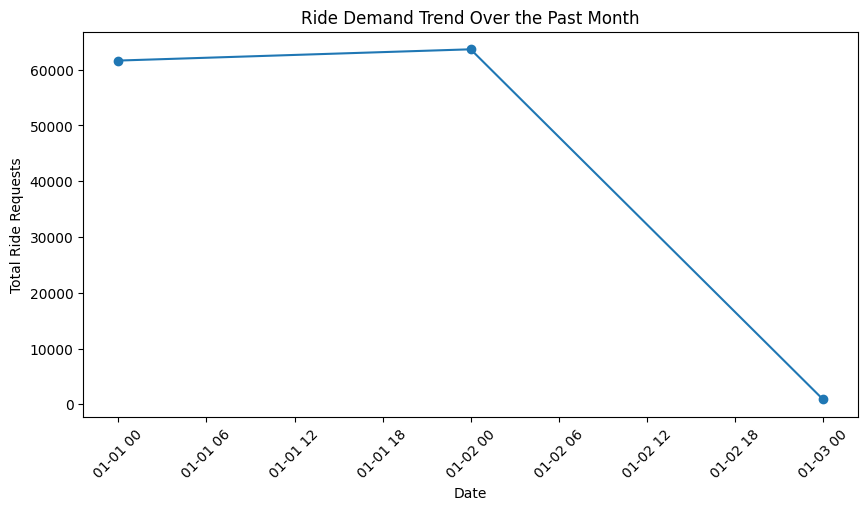

In [17]:
plt.figure(figsize=(10, 5))
data['date'] = data['ride_timestamp'].dt.date
data.groupby('date')['ride_requests'].sum().plot(kind='line', marker='o')
plt.title('Ride Demand Trend Over the Past Month')
plt.xlabel('Date')
plt.ylabel('Total Ride Requests')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Average Ride Demand During Peak Hours (7-9 AM, 5-7 PM)

In [18]:
peak_hours = data[data['ride_timestamp'].dt.hour.isin([7, 8, 17, 18])]
avg_peak_demand = peak_hours['ride_requests'].mean()
print("Average ride demand during peak hours:", avg_peak_demand)

Average ride demand during peak hours: 124.2


In [ ]:
#  line Plot: Weather Conditions vs. Ride Demand

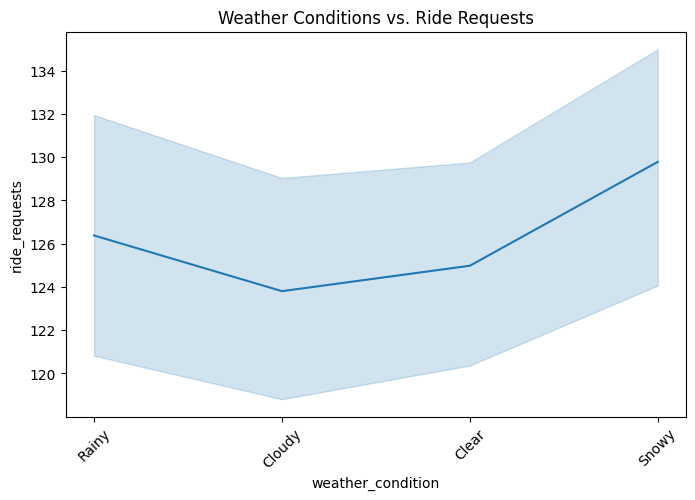

In [20]:
plt.figure(figsize=(8, 5))
sns.lineplot(x=data['weather_condition'], y=data['ride_requests'])
plt.title('Weather Conditions vs. Ride Requests')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#  Heatmap: Correlation Between Ride Requests & Fulfillments

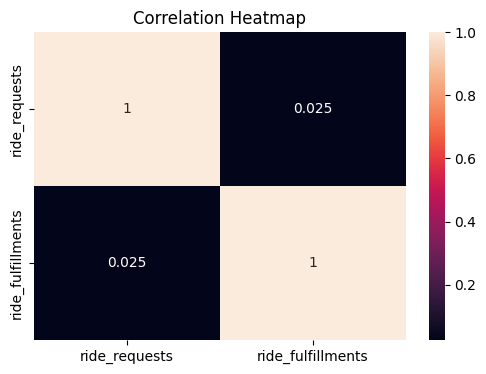

In [28]:
plt.figure(figsize=(6, 4))
sns.heatmap(data[['ride_requests', 'ride_fulfillments']].corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Average Ride Distance for High-Demand Locations (assuming 'ride_distance' exists)

In [35]:
top_locations = data.groupby('location')['ride_requests'].sum().nlargest(5).index
high_demand_locs = data[data['location'].isin(top_locations)]
if 'ride_distance' in data.columns:
    avg_distance = high_demand_locs.groupby('location')['ride_distance'].mean()
    print(avg_distance)

In [ ]:
# Time Series Analysis: Trends Over 6 Months (if more data available)

C:\Users\zisan\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1567: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


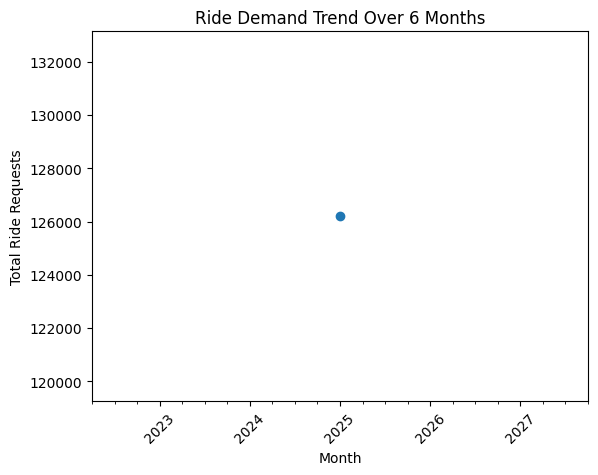

In [36]:
data['month'] = data['ride_timestamp'].dt.to_period('M')
data.groupby('month')['ride_requests'].sum().plot(kind='line', marker='o')
plt.title('Ride Demand Trend Over 6 Months')
plt.xlabel('Month')
plt.ylabel('Total Ride Requests')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Bar Chart: Number of Rides Requested Per Day

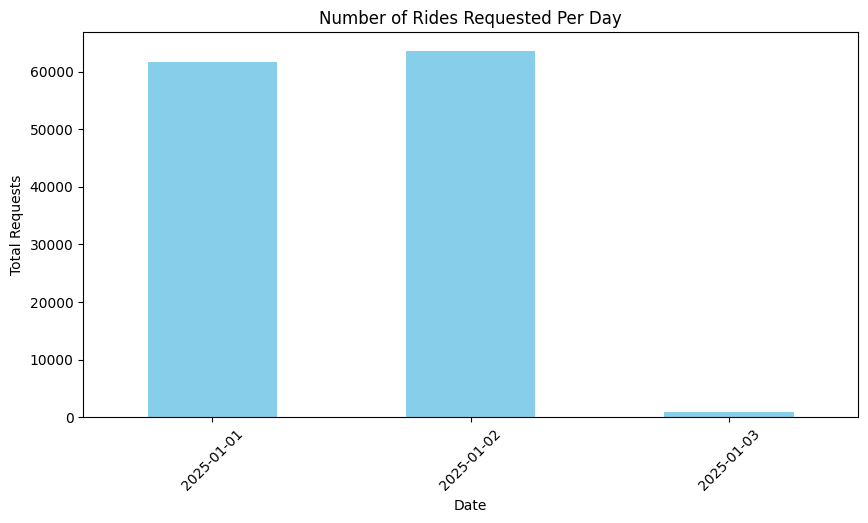

In [37]:
plt.figure(figsize=(10, 5))
data.groupby('date')['ride_requests'].sum().plot(kind='bar', color='skyblue')
plt.title('Number of Rides Requested Per Day')
plt.xlabel('Date')
plt.ylabel('Total Requests')
plt.xticks(rotation=45)
plt.show()

In [38]:
# Pie Chart: Ride Request Distribution Across Locations

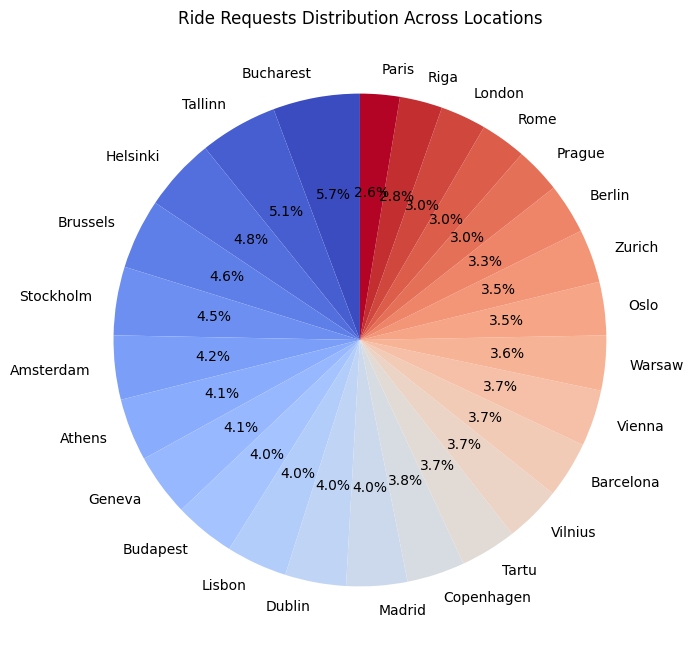

In [39]:
plt.figure(figsize=(8, 8))
data['location'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='coolwarm')
plt.title('Ride Requests Distribution Across Locations')
plt.ylabel('')
plt.show()